In [ ]:
import pandas as pd

# Carregar os dados
detailed_df = pd.read_csv('detailed_autism_data.csv')
trend_df = pd.read_csv('autism_trend_data.csv')

In [ ]:
!pip install pandera
import pandera as pa
from pandera import Column, Check

# Schema para detalhe
detailed_schema = pa.DataFrameSchema(
    {
        "Year": Column(int, Check.in_range(2000, 2023), nullable=False),
        "Age": Column(int, Check.in_range(3, 25), nullable=False),
        "Gender": Column(str, Check.isin(["Male", "Female"]), nullable=False),
        "Diagnosis_Age": Column(int, Check.in_range(2, 25), nullable=False),
        "Autism_Type": Column(str, Check.isin(["Mild", "Moderate", "Severe"]), nullable=False),
        "Support_Level": Column(str, Check.isin(["Level 1", "Level 2", "Level 3"]), nullable=False),
    }
)

# Schema para trend
trend_schema = pa.DataFrameSchema(
    {
        "Year": Column(int, Check.in_range(2000, 2023), nullable=False),
        "Cases": Column(int, Check.greater_than_or_equal_to(0), nullable=False),
    }
)

# Validando schemas
try:
    detailed_schema.validate(detailed_df)
    print("Detailed autism data is valid.")
except Exception as e:
    print(f"Validation error in detailed data: {e}")

try:
    trend_schema.validate(trend_df)
    print("Autism trend data is valid.")
except Exception as e:
    print(f"Validation error in trend data: {e}")

Detailed autism data is valid.
Autism trend data is valid.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           100 non-null    int64 
 1   Age            100 non-null    int64 
 2   Gender         100 non-null    object
 3   Diagnosis_Age  100 non-null    int64 
 4   Autism_Type    100 non-null    object
 5   Support_Level  100 non-null    object
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


Quantidade de registros por tipo de autismo:

Autism_Type
Mild        51
Moderate    34
Severe      15
Name: count, dtype: int64
Proporção por genero:

Gender
Female    0.53
Male      0.47
Name: proportion, dtype: float64
Idade media por nivel de surpote: Support_Level
Level 1    12.478261
Level 2    11.655172
Level 3    11.840000
Name: Age, dtype: float64
Ano com mais diagnósticos registrados: 2014


<ipython-input-42-9ec8ae96440c>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=detailed_df, x='Autism_Type', palette='cool')


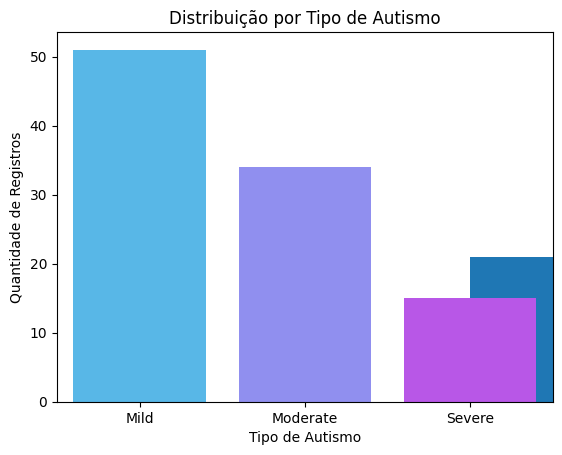

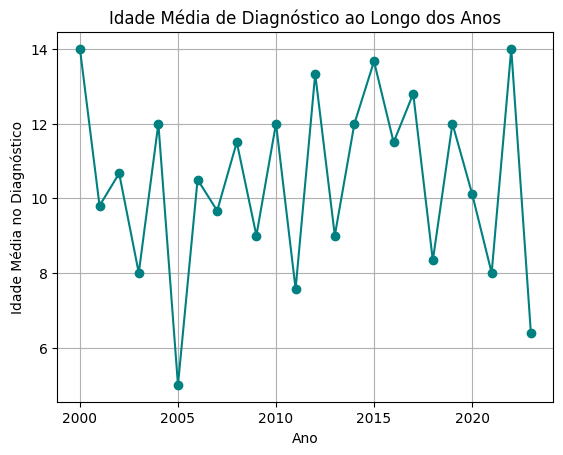

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dados relacionados ao data frame do detalhe

# Visualizar primeiros registros
detailed_df.head()
detailed_df.info()

print("\n")

# Quantidade de registros por tipo de autismo
autism_type_counts = detailed_df['Autism_Type'].value_counts()
print(f"Quantidade de registros por tipo de autismo:\n\n{autism_type_counts}")

# Distribuição de idades no momento do diagnóstico
detailed_df['Diagnosis_Age'].hist(bins=10, grid=False)

# Proporção por genero
gender_distribution = detailed_df['Gender'].value_counts(normalize=True)
print(f"Proporção por genero:\n\n{gender_distribution}")

# Idade media por nivel de surpote
average_age_by_support = detailed_df.groupby('Support_Level')['Age'].mean()
print(f"Idade media por nivel de surpote: {average_age_by_support}")

# Ano com maior registros de diagnóstico
most_common_year = detailed_df['Year'].value_counts().idxmax()
print(f"Ano com mais diagnósticos registrados: {most_common_year}")

# Distribuição por tipo de autismo
sns.countplot(data=detailed_df, x='Autism_Type', palette='cool')
plt.title('Distribuição por Tipo de Autismo')
plt.xlabel('Tipo de Autismo')
plt.ylabel('Quantidade de Registros')
plt.show()

# Média de idade de diaginóstico por ano
avg_diagnosis_age_by_year = detailed_df.groupby('Year')['Diagnosis_Age'].mean()
plt.plot(avg_diagnosis_age_by_year.index, avg_diagnosis_age_by_year.values, marker='o', color='teal')
plt.title('Idade Média de Diagnóstico ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Idade Média no Diagnóstico')
plt.grid(True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    24 non-null     int64
 1   Cases   24 non-null     int64
dtypes: int64(2)
memory usage: 512.0 bytes


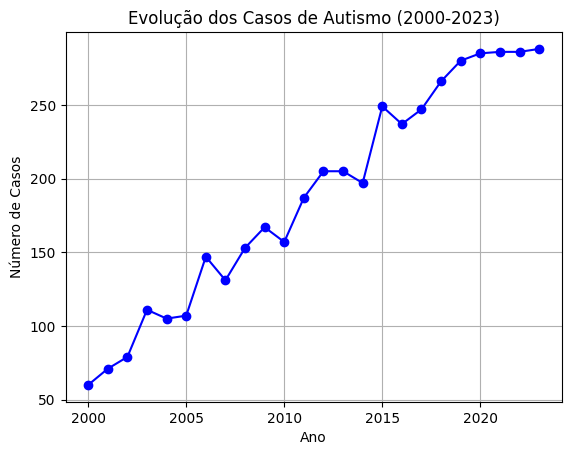



Aumento médio anual de casos: 9.91


In [ ]:
import matplotlib.pyplot as plt

# Dados relacionados ao data frame de trend

# Trend
trend_df.head()
trend_df.info()

# Evolução dos casos nos últimos anos
plt.plot(trend_df['Year'], trend_df['Cases'], marker='o', color='b')
plt.title('Evolução dos Casos de Autismo (2000-2023)')
plt.xlabel('Ano')
plt.ylabel('Número de Casos')
plt.grid(True)
plt.show()

print("\n")

# Taxa de aumento de casos
trend_df['Yearly_Change'] = trend_df['Cases'].diff()
average_increase = trend_df['Yearly_Change'].mean()
print(f"Aumento médio anual de casos: {average_increase:.2f}")

Autism_Type  Mild  Moderate  Severe
Year                               
2000          2.0       1.0     NaN
2001          1.0       2.0     2.0
2002          1.0       1.0     1.0
2003          3.0       3.0     NaN
2004          NaN       1.0     NaN
2005          NaN       2.0     NaN
2006          3.0       2.0     1.0
2007          5.0       1.0     NaN
2008          3.0       1.0     NaN
2009          3.0       NaN     NaN
2010          NaN       3.0     NaN
2011          3.0       1.0     3.0
2012          2.0       NaN     1.0
2013          2.0       1.0     1.0
2014          5.0       1.0     2.0
2015          2.0       1.0     NaN
2016          NaN       2.0     NaN
2017          3.0       2.0     NaN
2018          1.0       2.0     NaN
2019          2.0       1.0     NaN
2020          5.0       2.0     1.0
2021          2.0       1.0     1.0
2022          1.0       1.0     1.0
2023          2.0       2.0     1.0


Year
2000    14.000000
2001     9.800000
2002    10.666667
200

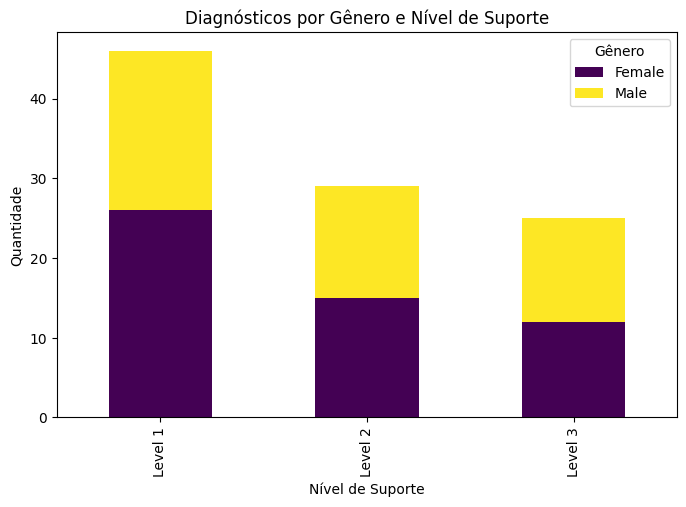

In [ ]:
# Dados combinados

# Tipos de autimos por ano
autism_by_year = detailed_df.groupby(['Year', 'Autism_Type']).size().unstack()
print(autism_by_year)
print("\n")

# Idade média de diagóstico por ano
average_diagnosis_age_by_year = detailed_df.groupby('Year')['Diagnosis_Age'].mean()
print(average_diagnosis_age_by_year)
print("\n")

# Correlação entre nível de suporte e tipo de autismo
support_autism_correlation = pd.crosstab(detailed_df['Support_Level'], detailed_df['Autism_Type'])
print(support_autism_correlation)

# Diagnósticos por gênero e nível de suporte
support_gender = pd.crosstab(detailed_df['Support_Level'], detailed_df['Gender'])
support_gender.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 5))
plt.title('Diagnósticos por Gênero e Nível de Suporte')
plt.xlabel('Nível de Suporte')
plt.ylabel('Quantidade')
plt.legend(title='Gênero')
plt.show()
